In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# 1.1.1 Split data into train and test data
from sklearn.model_selection import train_test_split

# 1.1.2 PReprocessong:
from sklearn.preprocessing import StandardScaler

# 1.1.3 Import class DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier as dtree
import random
# 1.1.4 To draw decision tree
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris
import os
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from pandas import read_csv

In [2]:
df= pd.read_csv('Dataset.csv',header=0, encoding = 'unicode_escape')

# To find Rows and Columns

In [3]:
df.shape

(614, 13)

# No of Elements

In [4]:
df.size

7982

# datatype define

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


# Statistical Summary

In [6]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,1.015216,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Display

In [7]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Null Values

In [8]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df.dropna(inplace=True, axis=0)

# Value Counts

In [10]:
p=df.Gender.value_counts()
p.head()

Male      394
Female     86
Name: Gender, dtype: int64

In [11]:
p=df.Loan_Status.value_counts()
p.head()

Y    332
N    148
Name: Loan_Status, dtype: int64

# Labelencoding to convert categorical value to numerical 

In [12]:
from sklearn.preprocessing import LabelEncoder
cols = ['Education', 'Self_Employed', 'Property_Area', 'Loan_Status','Gender', 'Married','Loan_Amount_Term']
#
# Encode labels of multiple columns at once
#
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1.0,0,0,4583,1508.0,128.0,7,1.0,0,0
2,LP001005,1,1,0.0,0,1,3000,0.0,66.0,7,1.0,2,1
3,LP001006,1,1,0.0,1,0,2583,2358.0,120.0,7,1.0,2,1
4,LP001008,1,0,0.0,0,0,6000,0.0,141.0,7,1.0,2,1
5,LP001011,1,1,2.0,0,1,5417,4196.0,267.0,7,1.0,2,1


In [13]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Fillna for filling null values

In [14]:
#df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
#df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
#df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [15]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

C:\Users\NIKHIL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

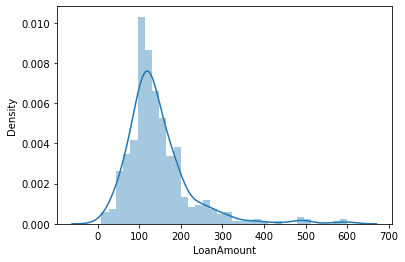

In [16]:
sns.distplot(df.LoanAmount) 

C:\Users\NIKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome'>

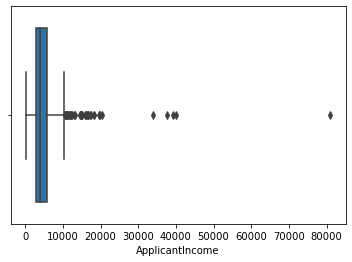

In [17]:
sns.boxplot(df.ApplicantIncome)

# Drop null value and Column split into groups


In [18]:
#df.dropna(inplace=True, axis=0)
#df['impact_dang']= pd.cut(df.Possible_impacts,bins=[0,300,700,1144] , right=True, labels=['1','2','3'])

In [19]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1.0,0,0,4583,1508.0,128.0,7,1.0,0,0
2,LP001005,1,1,0.0,0,1,3000,0.0,66.0,7,1.0,2,1
3,LP001006,1,1,0.0,1,0,2583,2358.0,120.0,7,1.0,2,1
4,LP001008,1,0,0.0,0,0,6000,0.0,141.0,7,1.0,2,1
5,LP001011,1,1,2.0,0,1,5417,4196.0,267.0,7,1.0,2,1


In [20]:
from sklearn.model_selection import train_test_split

X = df.drop(['Loan_ID'], axis =1 )
y = df.iloc[:, -1]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)
X.head() 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1.0,0,0,4583,1508.0,128.0,7,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,7,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,7,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,7,1.0,2,1
5,1,1,2.0,0,1,5417,4196.0,267.0,7,1.0,2,1


In [21]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
LR = KNeighborsClassifier(n_neighbors=10)


# KNN Accuracy


In [22]:
#fiting the model
LR.fit(X_train, y_train)

#prediction
y_pred = LR.predict(X_test)

#Accuracy
print("Accuracy ", LR.score(X_test, y_test)*100)

Accuracy  70.13888888888889


# Decision tree using Gini

In [23]:
df = dtree(
           criterion="gini",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )

In [24]:
df.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
y_te = df.predict(X_test)

In [26]:
np.sum((y_test == y_te))/y_test.size 

1.0

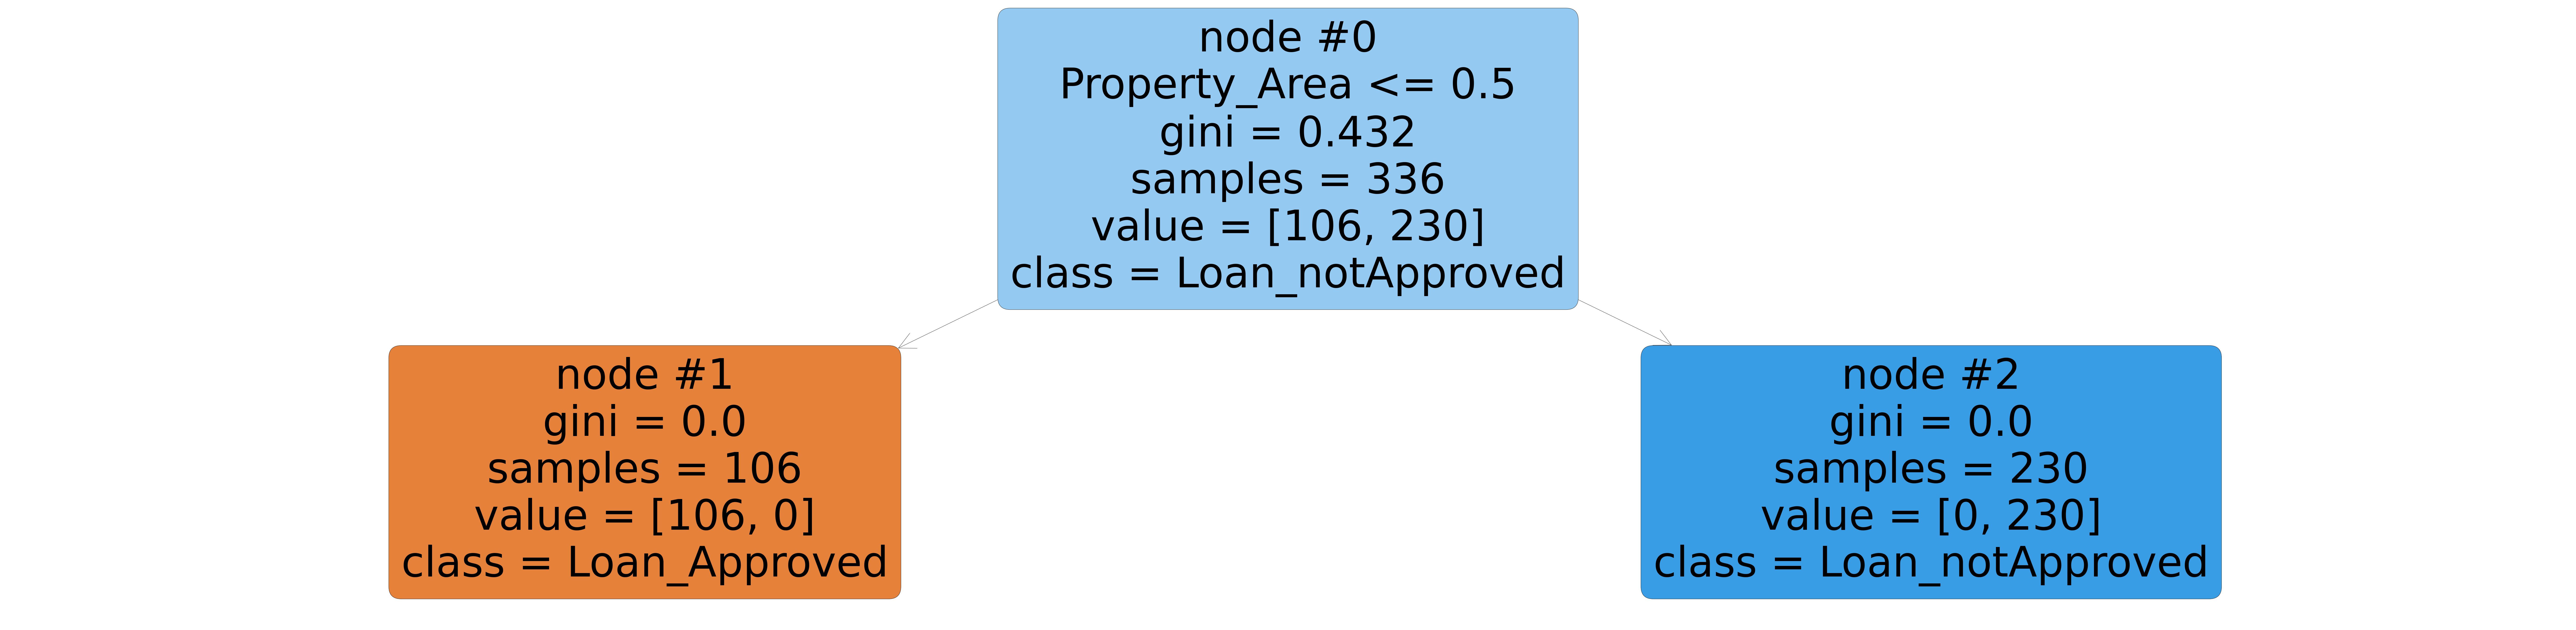

In [36]:
_= plt.figure(figsize=(200,50))
_= plot_tree(
            df,
            max_depth = 6,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ["Loan_ID","Gender","Married","Dependents","Education","Self_Employed","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History","Property_Area"],
            class_names = ["Loan_Approved","Loan_notApproved"] #add loan status whether to approve or not rest in feature names 
            )

_= plt.show()

# Decision Tree using Entropy

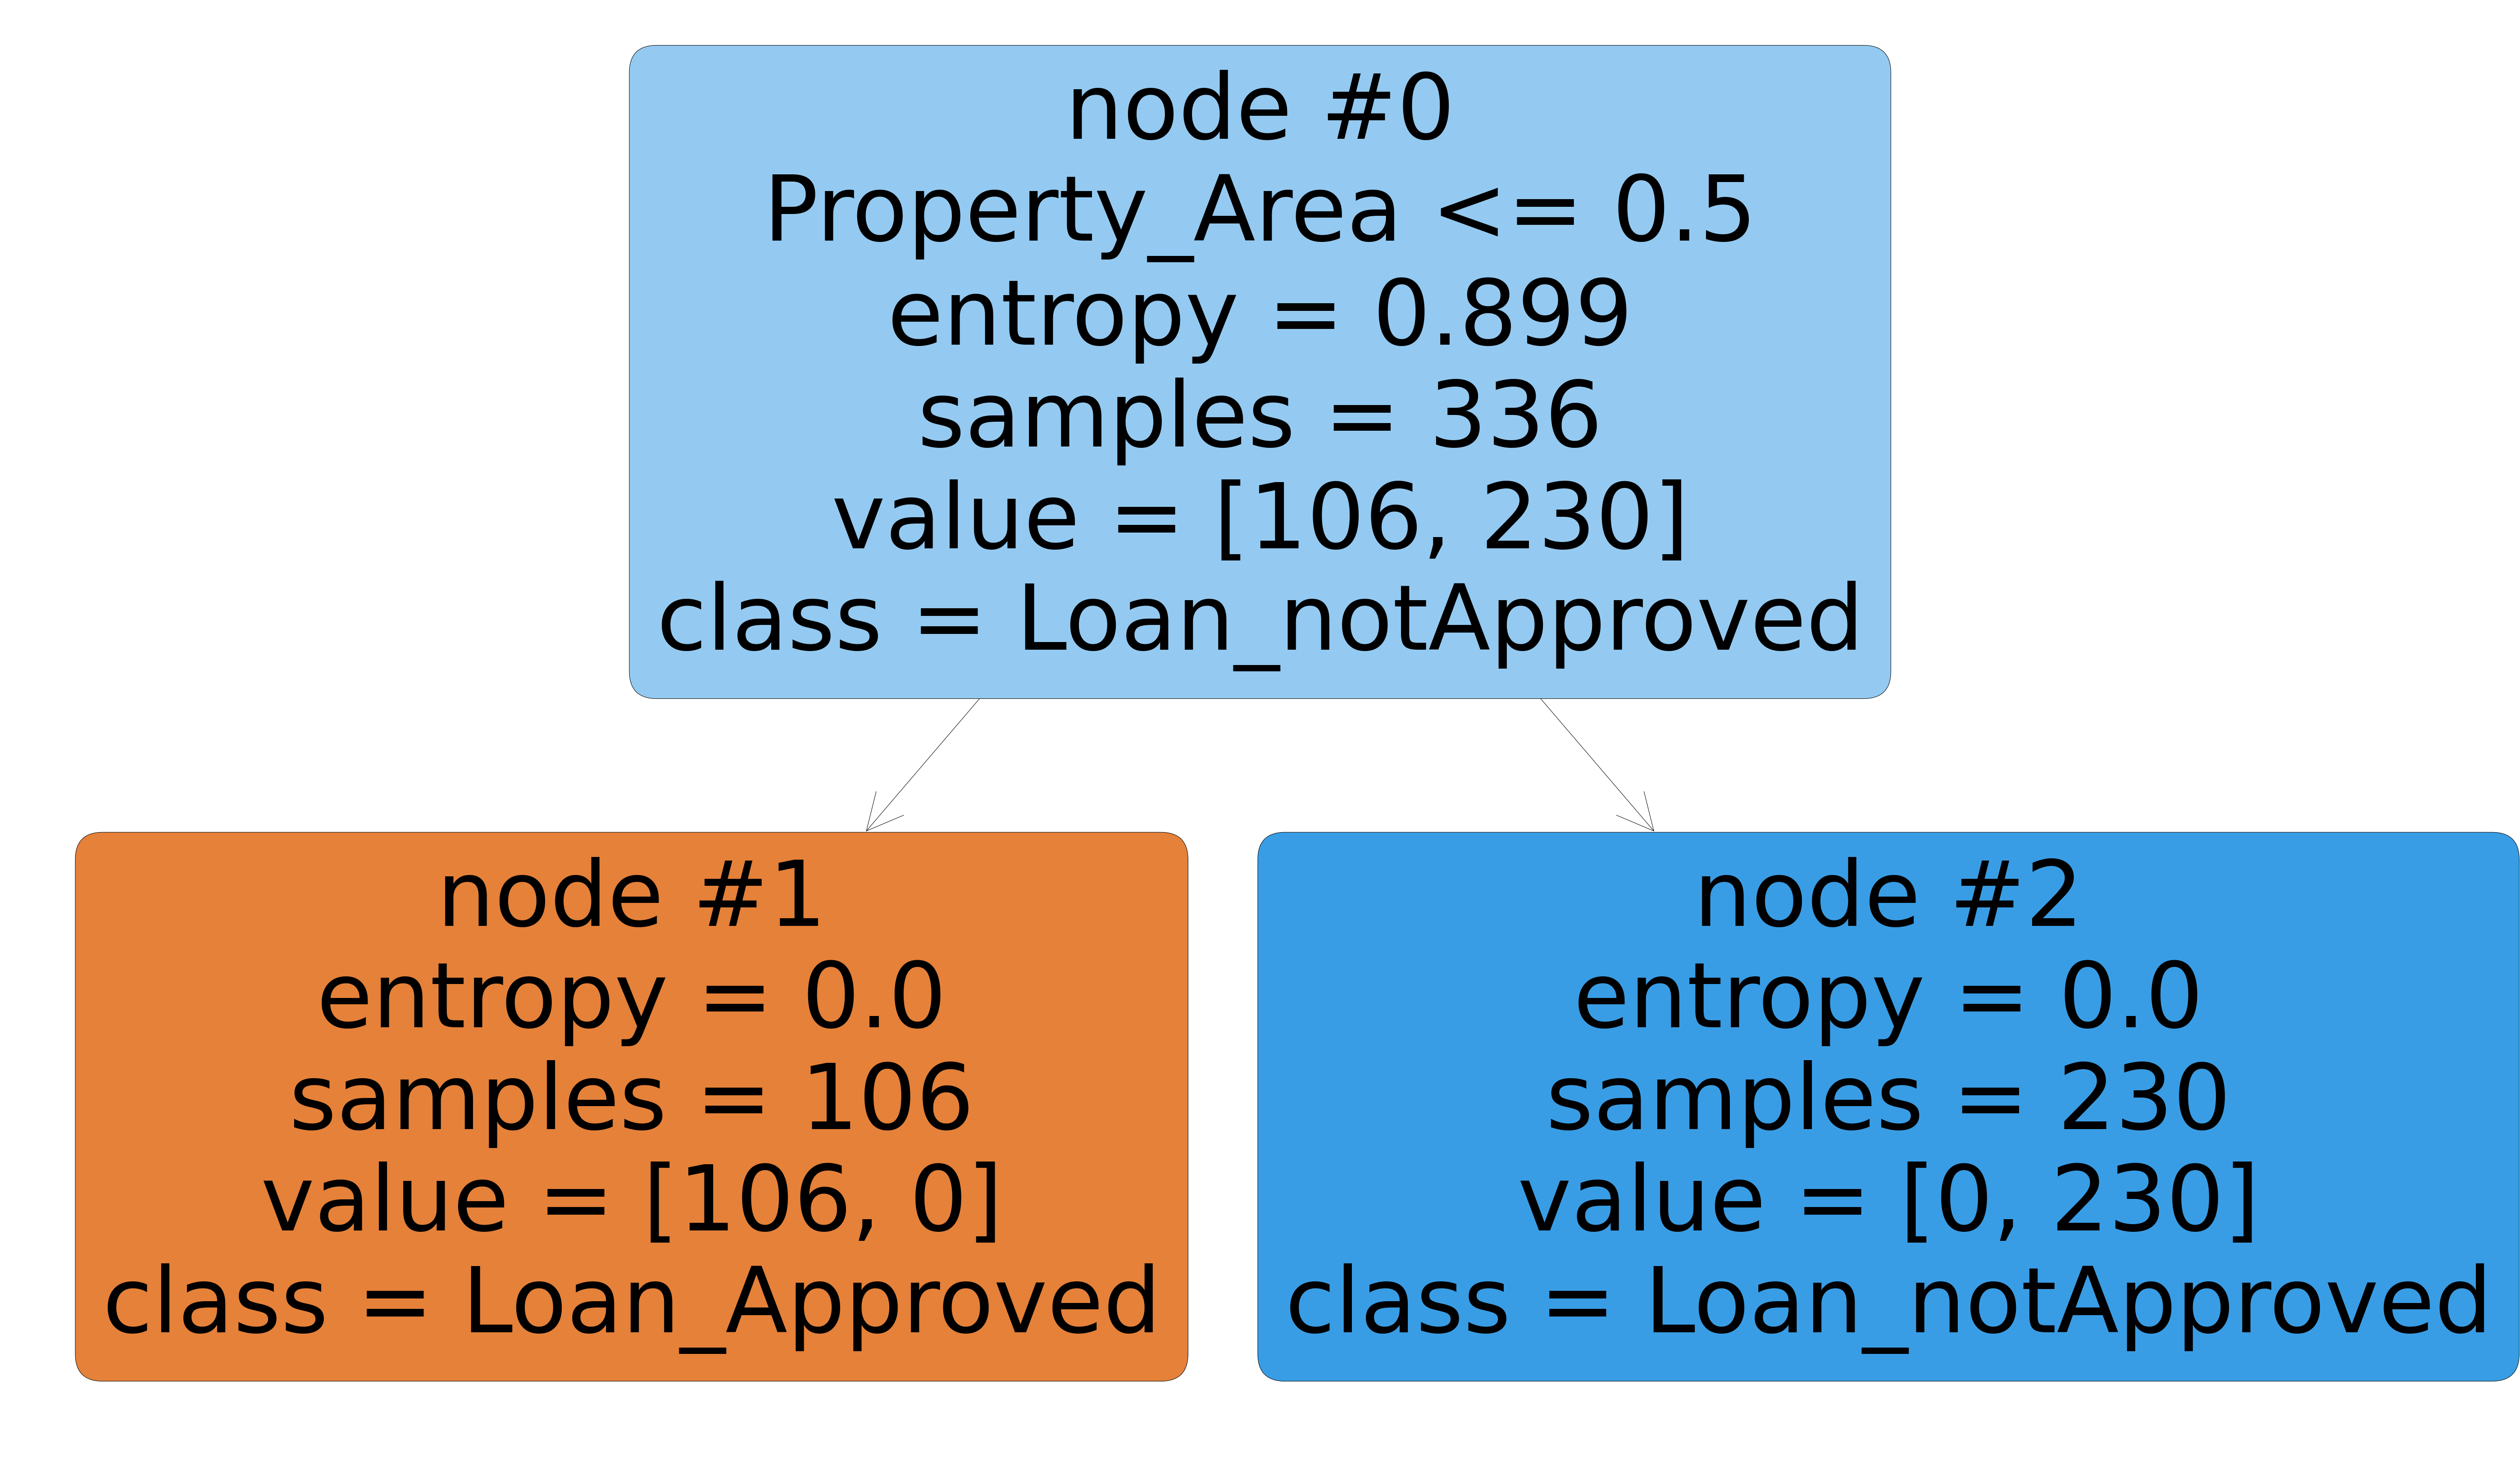

In [37]:
# 5.0 Plot decision tree with 'entropy' as criterion:

df = dtree(
           criterion="entropy",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )
# 5.1
_=df.fit(X_train,y_train)

# 5.2
_=plt.figure(figsize=(100,60))
_=plot_tree(
            df,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names =  ["Loan_ID","Gender","Married","Dependents","Education","Self_Employed","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History","Property_Area"],
            class_names = ["Loan_Approved","Loan_notApproved"]
            )

_=plt.show()

In [38]:
y_te = df.predict(X_test)
np.sum((y_test == y_te))/y_test.size

1.0

In [39]:
fi = df.feature_importances_
fi

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

# Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 8)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=8)

In [41]:
model.score(X_test, y_test)

1.0

In [42]:
y_pred = model.predict(X_test)

# Confusion Matrix


In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix (y_test, y_pred)
cm

array([[ 42,   0],
       [  0, 102]], dtype=int64)

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00       102

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144



In [45]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error 0.0


In [46]:
print(metrics.confusion_matrix(y_test, y_pred))
print (classification_report(y_test, y_pred))
print("Accuracy score is:", accuracy_score(y_test,y_pred)*100,"%s")

[[ 42   0]
 [  0 102]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00       102

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144

Accuracy score is: 100.0 %s


Text(33.0, 0.5, 'Actual')

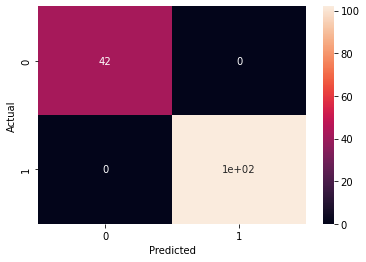

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure()
sn.heatmap(cm, annot= True)
plt.xlabel('Predicted')
plt.ylabel('Actual')